# PIVIT - Analise dos Históricos dos Alunos de Sistema de Informação

In [32]:
import pandas as pd

arquivo_excel = 'historico_por_aluno.xlsx'  
abas = pd.read_excel(arquivo_excel, sheet_name=None)
abas = {nome: df for nome, df in abas.items() if nome.lower() != 'resumo'}
database = pd.concat(abas.values(), ignore_index=True) # Concatenando todas as abas em um único DataFrame
database = database.drop('nome', axis = 1) # Removendo a coluna 'nome' que não é necessária para o modelo
database = database.dropna(subset=['disciplina']) # Removendo linhas com valores ausentes
database['nota'] = pd.to_numeric(database['nota'], errors='coerce').fillna(0.0)



## Análise: Média geral por aluno apenas para as disciplinas aprovadas.

In [33]:
dados_aprovados = database[database['situacao'] == 'APROVADO']
media_geral_por_aluno = dados_aprovados.groupby('matricula')['nota'].mean().reset_index()
media_geral_por_aluno.columns = ['matricula', 'media_geral']
media_geral_por_aluno


,matricula,media_geral
0,20160116165,7.404762
1,20160121960,7.642222
2,20160140760,7.400000
3,20170148977,7.869565
4,20170170842,7.397727
...,...,...
182,20240126078,8.500000
183,20240126111,7.133333
184,20240126130,8.283333
185,20240135881,7.840000


## Análise: Notas de em que cada aluno foi aprovado em cada disciplina.

In [34]:
dados_unicos = dados_aprovados.drop_duplicates(subset=['matricula', 'disciplina'])
dados_unicos 

,matricula,disciplina,nota,situacao
0,20160116165,INTRODUCAO A SOCIOLOGIA,8.7,APROVADO
1,20160116165,METODOLOGIA CIENTÍFICA,8.9,APROVADO
3,20160116165,INTRODUCAO A PROGRAMACAO,5.1,APROVADO
4,20160116165,INTRODUCAO AO COMPUTADOR,9.9,APROVADO
5,20160116165,ADMINISTRAÇÃO I,7.7,APROVADO
...,...,...,...,...
5573,20240135881,ADMINISTRAÇÃO I,8.8,APROVADO
5574,20240135881,MATEMÁTICA DISCRETA,7.3,APROVADO
5580,20240139370,INTRODUCAO A SOCIOLOGIA,8.3,APROVADO
5581,20240139370,METODOLOGIA CIENTÍFICA,9.8,APROVADO


## Analise: Nota media nas disciplina dos alunos com situação = 'APROVADO'

In [35]:
media_geral_por_disciplina = dados_unicos.groupby('disciplina')['nota'].mean().reset_index()
media_geral_por_disciplina.columns = ['disciplina', 'media_geral']
media_geral_por_disciplina['media_geral'] = media_geral_por_disciplina['media_geral'].astype(float)
media_geral_por_disciplina ['media_geral'] = media_geral_por_disciplina['media_geral'].apply(lambda x:f'{x:.2f}')
media_geral_por_disciplina

,disciplina,media_geral
0,ADMINISTRAÇÃO I,8.81
1,ADMINISTRAÇÃO II,8.36
2,ALGEBRA LINEAR,7.74
3,ALGEBRA LINEAR E GEOMETRIA ANALITICA,8.40
4,ALGORITMOS E ESTRUTURA DE DADOS I,8.36
...,...,...
67,SISTEMAS MULTIMIDIA,8.60
68,SISTEMAS OPERACIONAIS,8.00
69,T C C SISTEMAS DE INFORMACAO,9.21
70,TEORIA DE COMPUTACAO,6.00


## Calcula a quantidade de disciplinas cursadas por aluno

In [36]:
disciplinas_por_aluno = dados_unicos.groupby('matricula')['disciplina'].nunique().reset_index()
disciplinas_por_aluno.columns = ['matricula', 'qtd_disciplinas']
disciplinas_por_aluno

,matricula,qtd_disciplinas
0,20160116165,42
1,20160121960,45
2,20160140760,12
3,20170148977,23
4,20170170842,43
...,...,...
182,20240126078,6
183,20240126111,6
184,20240126130,6
185,20240135881,5


## Análise: Situações mais comuns (aprovado, reprovado, etc.)


In [37]:
situacoes = database['situacao'].value_counts().reset_index()
situacoes.columns = ['situacao', 'frequencia']
situacoes

,situacao,frequencia
0,APROVADO,3851
1,MATRICULADO,823
2,REPROVADO,346
3,TRANCADO,203
4,REP. FALTA,190
5,DISPENSADO,138
6,APROVEITADO,40


## Análise: Disciplinas com mais reprovações (REPROVADO ou REP. FALTA)



In [38]:
reprovacoes = database[database['situacao'].str.contains("REPROVADO|REP", case=False, na=False)]
reprov_por_disciplina = reprovacoes['disciplina'].value_counts().reset_index()
reprov_por_disciplina.columns = ['disciplina', 'reprovacoes']
reprov_por_disciplina

,disciplina,reprovacoes
0,LINGUAGEM DE PROGRAMACAO,52
1,INTRODUCAO A PROGRAMACAO,46
2,CÁLCULO DIFERENCIAL E INTEGRAL,37
3,LOGICA APLICADA A COMPUTACAO,30
4,MATEMÁTICA DISCRETA,23
5,ALGEBRA LINEAR,22
6,SISTEMAS OPERACIONAIS,17
7,INTRODUCAO AO COMPUTADOR,17
8,PROGRAMACAO ORIENTADA A OBJETOS,15
9,ADMINISTRAÇÃO II,13


## Análise: Alunos com mais trancamentos ou faltas


In [39]:
trancamentos = database[database['situacao'].str.contains(r"TRANCADO|REP\. FALTA", case=False, na=False)]
trancamentos_por_disciplina = trancamentos['disciplina'].value_counts().reset_index()
trancamentos_por_disciplina.columns = ['disciplina', 'trancamentos']
trancamentos_por_disciplina

,disciplina,trancamentos
0,LINGUAGEM DE PROGRAMACAO,36
1,CÁLCULO DIFERENCIAL E INTEGRAL,17
2,SISTEMAS OPERACIONAIS,15
3,PROBABILIDADE E ESTATISTICA,14
4,PORTUGUES INSTRUMENTAL,13
...,...,...
64,ALGEBRA LINEAR E GEOMETRIA ANALITICA,1
65,REDES DE COMPUTADORES I,1
66,INTRODUÇÃO À FILOSOFIA,1
67,SISTEMAS DISTRIBUIDOS,1


## Analise ETL
O objetivo é realizar uma analise identificando padrões entre os hitóricos dos alunos. Identificando onde estão as maiorws dificuldades dos alunos do curso, disciplinas que possuem maior taxa de trancamento e reprovação. 

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'trancamentos'}>]], dtype=object)

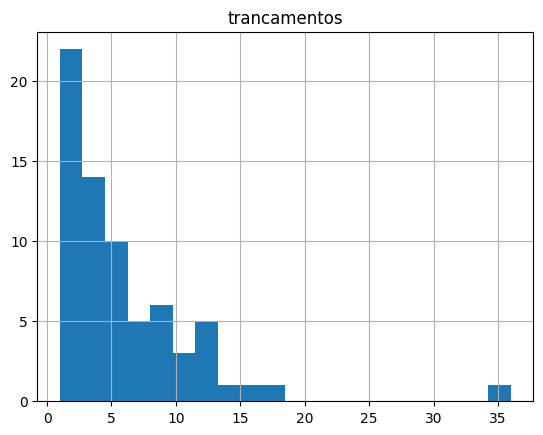

In [41]:
trancamentos_por_disciplina.hist(bins=20)

A partir do gráfico é possivel identificar os casos mais comuns 

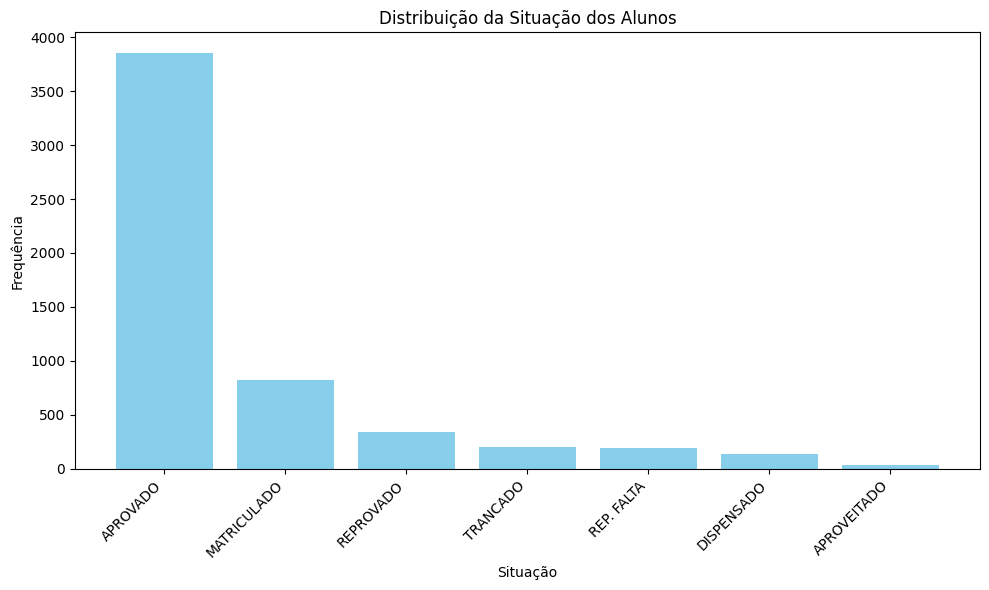

In [42]:
plt.figure(figsize=(10, 6))
plt.bar(situacoes['situacao'], situacoes['frequencia'], color='skyblue')
plt.xlabel('Situação')
plt.ylabel('Frequência')
plt.title('Distribuição da Situação dos Alunos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('distribuicao_situacao_alunos.png')


## A partir deste gráfico podemos identificar onde estão as disciplinas com mais reprovações no curso. 

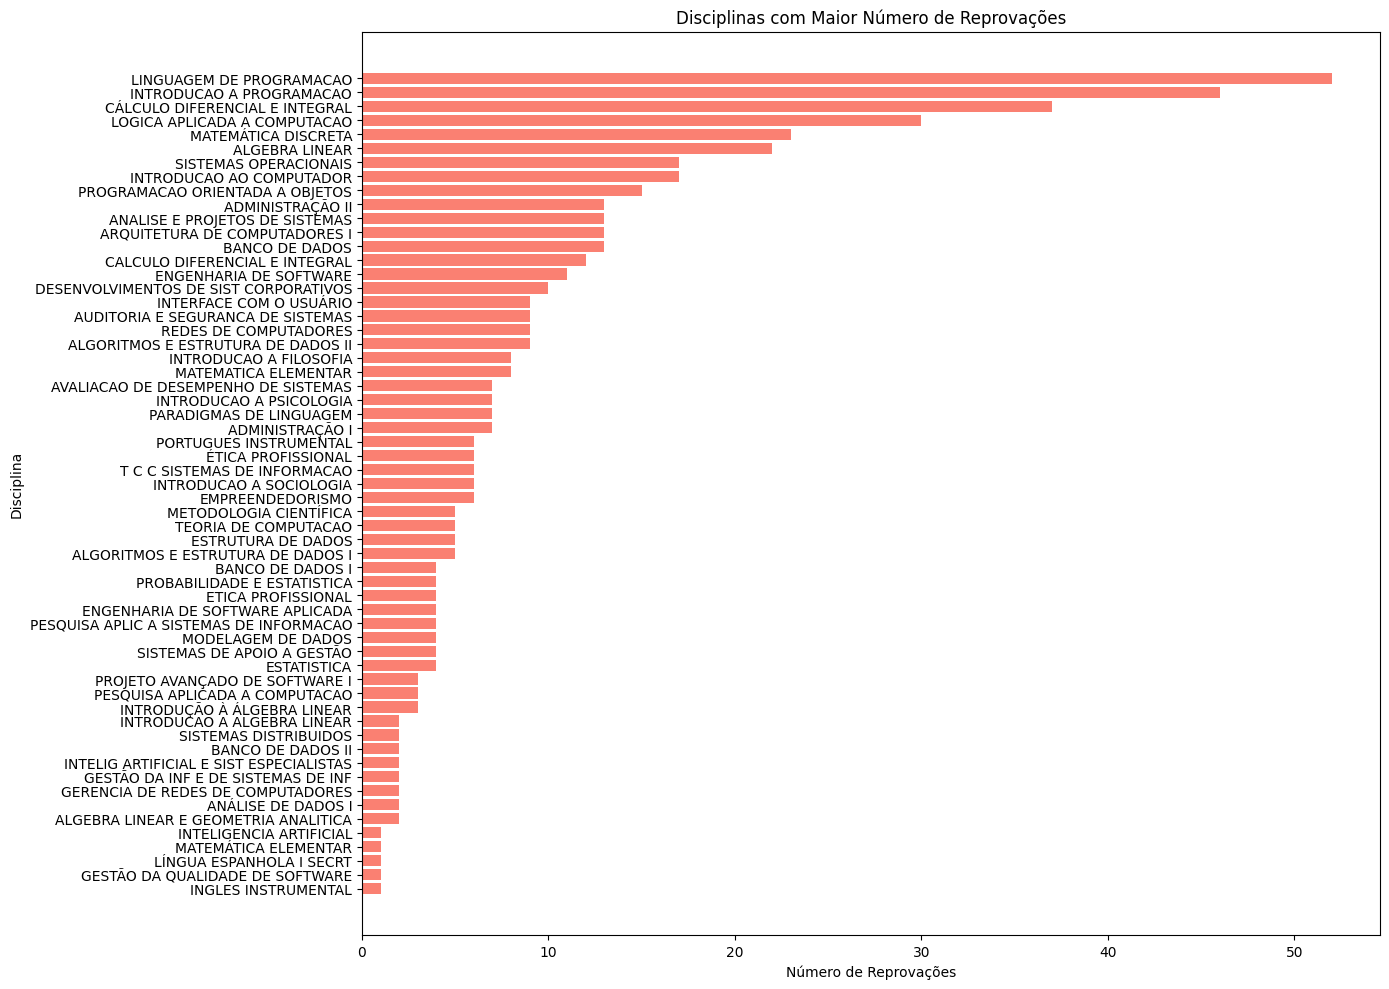

In [43]:
plt.figure(figsize=(14, 10))
plt.barh(reprov_por_disciplina['disciplina'], reprov_por_disciplina['reprovacoes'], color='salmon')
plt.xlabel('Número de Reprovações')
plt.ylabel('Disciplina')
plt.title('Disciplinas com Maior Número de Reprovações')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('reprovacoes_por_disciplina.png')

## A partir deste gráfico podemos identificar onde estão as disciplinas com mais trancamento no curso. 

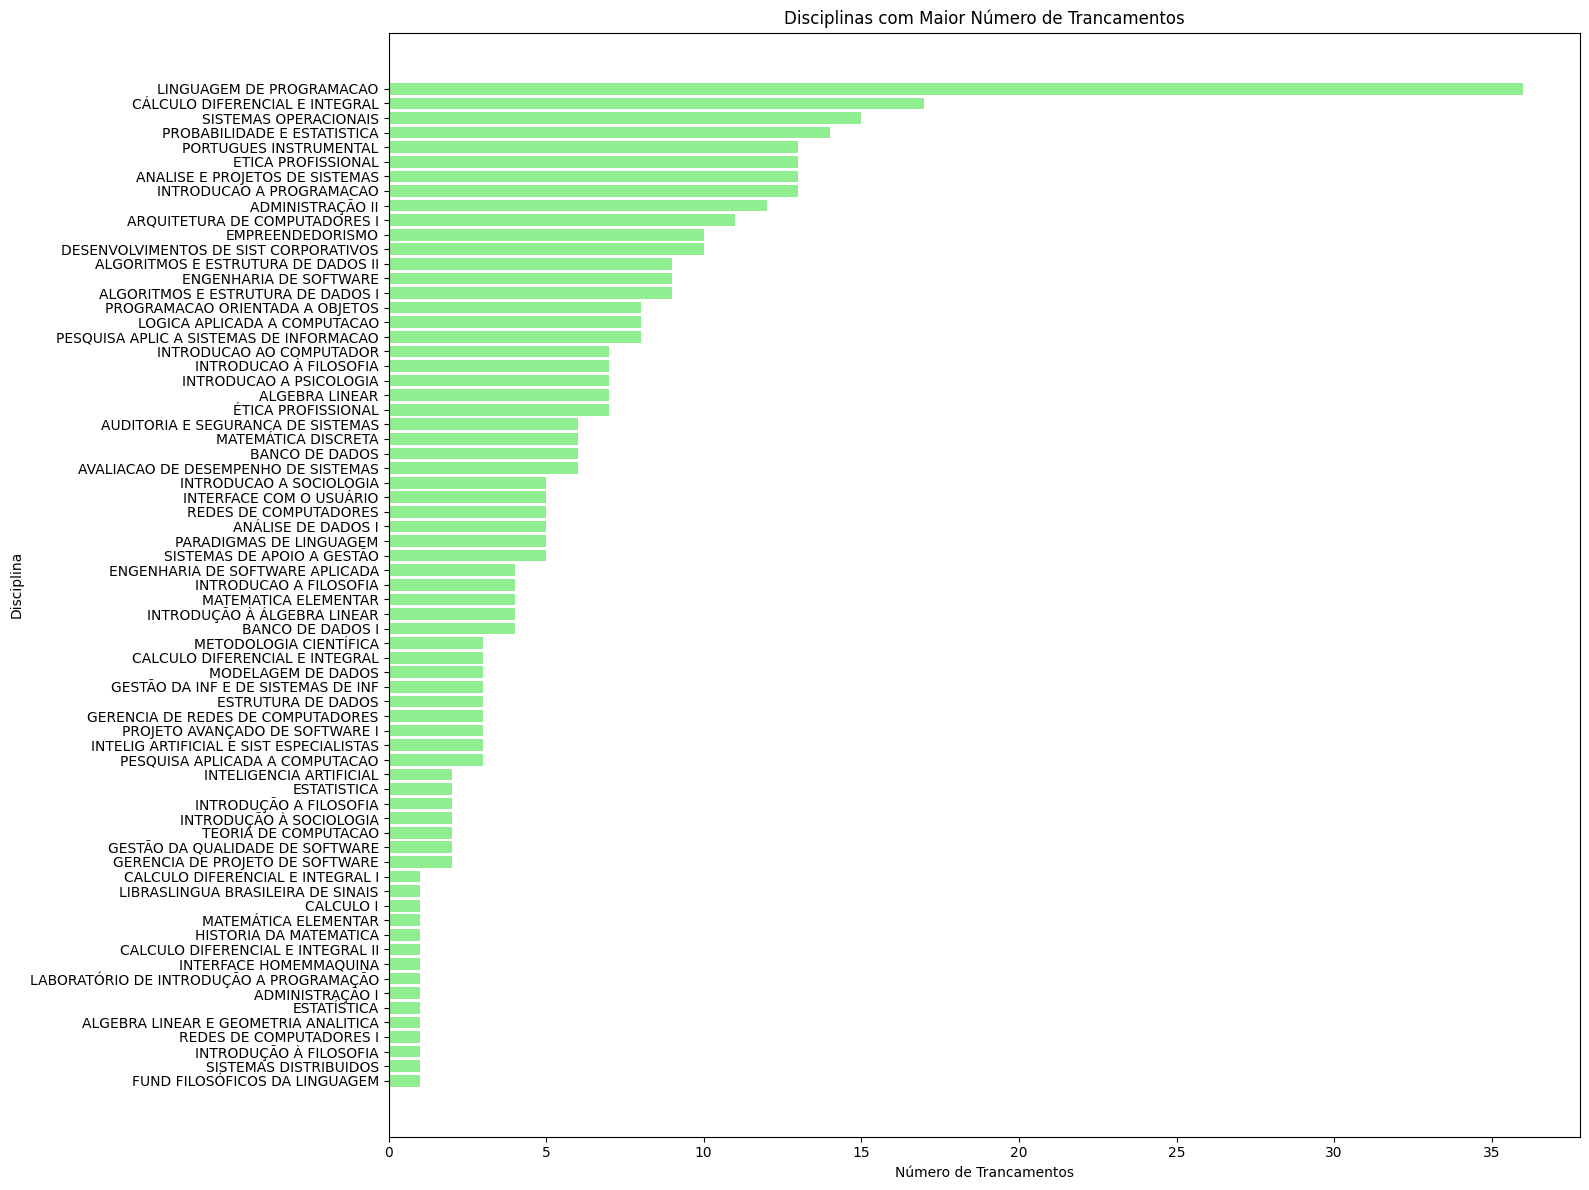

In [44]:
plt.figure(figsize=(16, 12))
plt.barh(trancamentos_por_disciplina['disciplina'], trancamentos_por_disciplina['trancamentos'], color='lightgreen')
plt.xlabel('Número de Trancamentos')
plt.ylabel('Disciplina')
plt.title('Disciplinas com Maior Número de Trancamentos')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('trancamentos_por_disciplina.png')

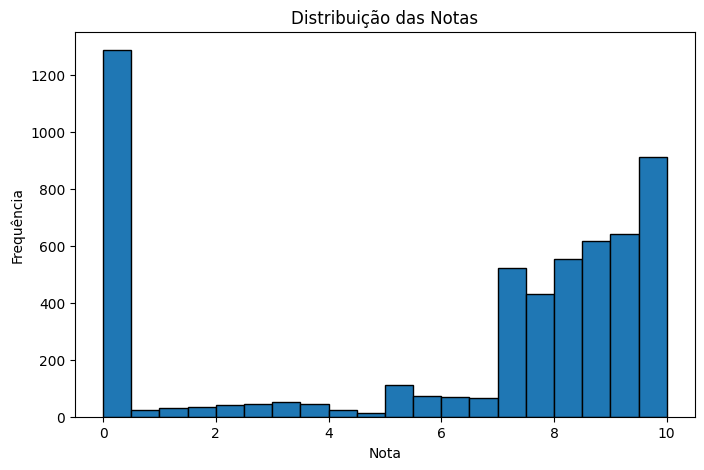

In [45]:
plt.figure(figsize=(8,5))
plt.hist(database["nota"], bins=20, edgecolor="black")
plt.title("Distribuição das Notas")
plt.xlabel("Nota")
plt.ylabel("Frequência")
plt.show()

A partir deste grafico podemos identificar as disciplinas com maior taxa de aprovação, onde temos algumas disciplinas que não compoem a grade curricular do curso, porém o discente pode ter pagado como uma optativa.

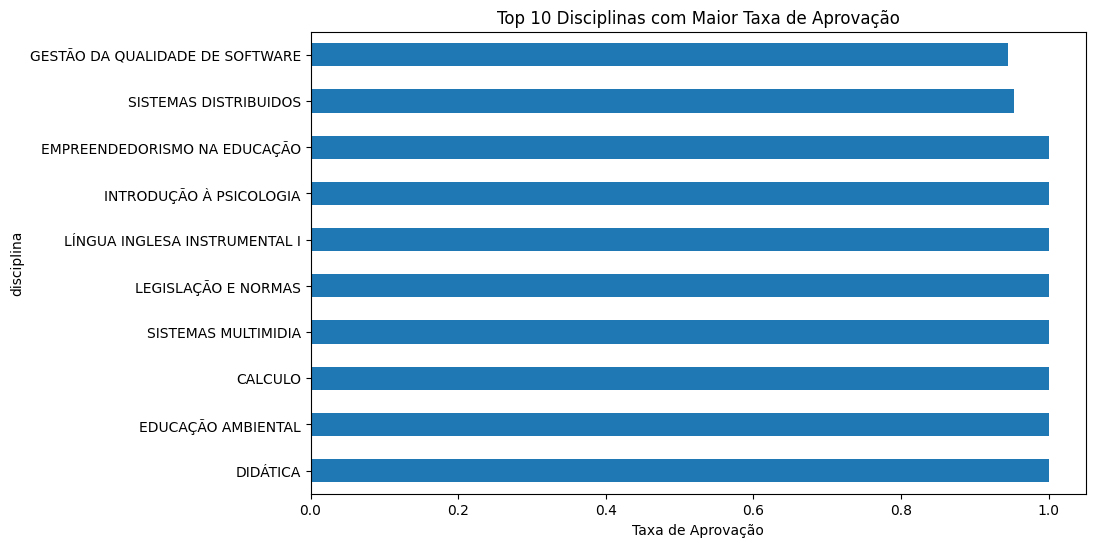

<Figure size 640x480 with 0 Axes>

In [46]:
taxa_aprov = database.groupby("disciplina")["situacao"].apply(lambda x: (x=="APROVADO").mean())
top10_aprov = taxa_aprov.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top10_aprov.plot(kind="barh")
plt.title("Top 10 Disciplinas com Maior Taxa de Aprovação")
plt.xlabel("Taxa de Aprovação")
plt.show()
plt.savefig('top10_disciplinas_maior_taxa_aprovacao.png')

A partir deste gráfico é possivel identificar as cdisciplinas com as maiores notas medias. Onde temos algumas disciplinas que não compoem a grade curricular do curso, porém o discente pode ter pagado como uma optativa.

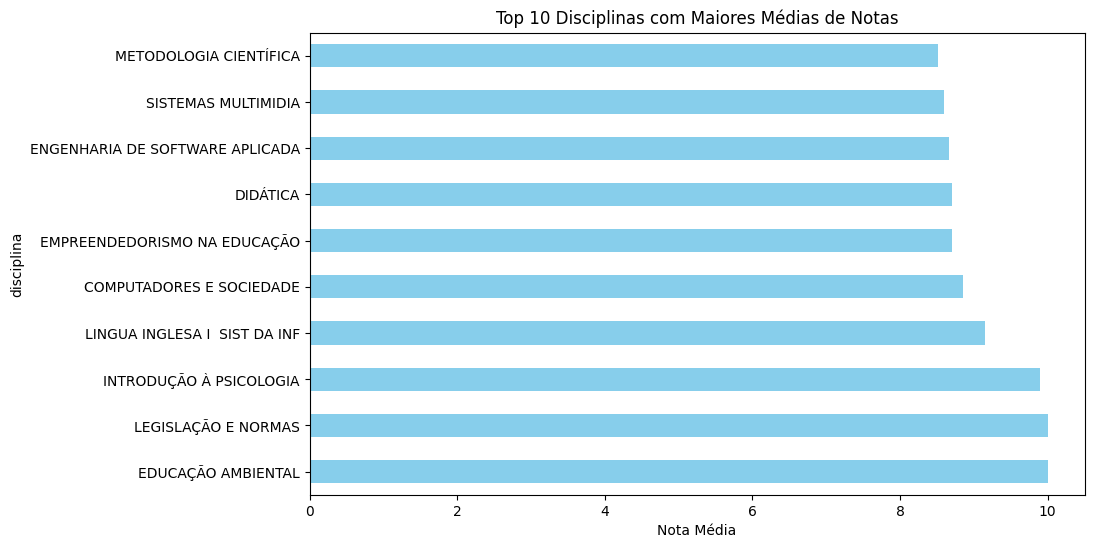

<Figure size 640x480 with 0 Axes>

In [47]:
media_notas = database.groupby("disciplina")["nota"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
media_notas.plot(kind="barh", color="skyblue")
plt.title("Top 10 Disciplinas com Maiores Médias de Notas")
plt.xlabel("Nota Média")
plt.show()
plt.savefig('top10_disciplinas_maiores_medias_notas.png')